# Image Filtering

* Apply custom-made filters to images (2D convolution)
* Box filter
* Various filters
* Sharpening filter
* Gaussian filter
* Thresholuding
* Sobel filter and Image Gradient

As in one-dimensional signals, images also can be filtered with various low-pass filters (LPF), high-pass filters (HPF), etc. 
LPF helps in removing noise, blurring images, etc. 
HPF filters help in finding edges in images.

## OpenCV
* How to install using conda
    * `conda install -c conda-forge py-opencv`

* Official Opencv doumentation
    * https://docs.opencv.org/4.4.0/index.html

As a first step, the OpenCV python library is imported.
The proper way to do this is to additionally assign it the name cv, which is used in the following to reference the library.

In [1]:
import os
import cv2 as cv # OpenCV
import numpy as np
from matplotlib import pyplot as plt

plt.rcParams['figure.figsize'] = [16, 9]

# %matplotlib qt
# %matplotlib inline

## Image Filters

OpenCV provides a function `cv.filter2D()` to convolve a kernel with an image. 

* Convolves an image with the kernel.
    * `dst = cv.filter2D( src, ddepth, kernel[, dst[, anchor[, delta[, borderType]]]])`
    * The function does actually compute correlation, not the convolution. If you need a real convolution, flip the kernel.
    * ddepth: bit depth of outout, set ddepth to -1 to retain bit depth of input


As an example, we will try an averaging filter on an image. 
A 5x5 averaging filter kernel will look like the below:

$K = \frac{1}{25} \begin{bmatrix} 1 & 1 & 1 & 1 & 1 \\ 1 & 1 & 1 & 1 & 1 \\ 1 & 1 & 1 & 1 & 1 \\ 1 & 1 & 1 & 1 & 1 \\ 1 & 1 & 1 & 1 & 1 \end{bmatrix}$

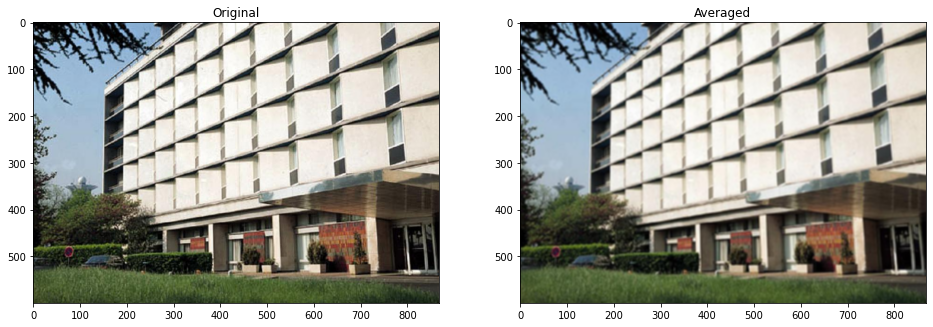

0.15705325140809012


In [2]:
img = cv.imread('./resources/building.jpg') # Read image, Returns Numpy ndarray

# make kernel (크기가 5인 박스필터)
kernel = np.array([[1,1,1,1,1],
                  [1,1,1,1,1],
                  [1,1,1,1,1],
                  [1,1,1,1,1],
                  [1,1,1,1,1],],dtype=np.float32) / 25 # int로 했을 경우 25로 나누면 0이되기 때문에 float

# image filtering
# TODO 
filtered = cv.filter2D(img, -1, kernel) # ddepth : output의 datatype
                                        # -1 : input의 datatype을 그대로 쓰겠다.(cv.CV_8U로 넣어도 됨. 이런 형태로 가능:cv.CV_32F)
# ----------------------------------------------------------------------------

plt.subplot(1,2,1),plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB)),plt.title('Original') # Displays image in a window
plt.subplot(1,2,2),plt.imshow(cv.cvtColor(filtered, cv.COLOR_BGR2RGB)),plt.title('Averaged') # cv.COLOR_BGR2RGB Convert함수
plt.show()

# compare image with the test image
ref = cv.imread("./resources/box5.png") # filter를 거친사진을 미리 저장해놨음
mse = np.mean((ref - filtered)**2)
print(mse) # 0이 나와야함
assert mse < 1 # 1보다 크면 프로그램 끝남

## Box filter
* Averages pixels in a box shaped window.
* Sum of kernel should be 1


The operation works like this: keep this kernel above a pixel, add all the pixels below this kernel, take the average, and replace the central pixel with the new average value. This operation is continued for all the pixels in the image.

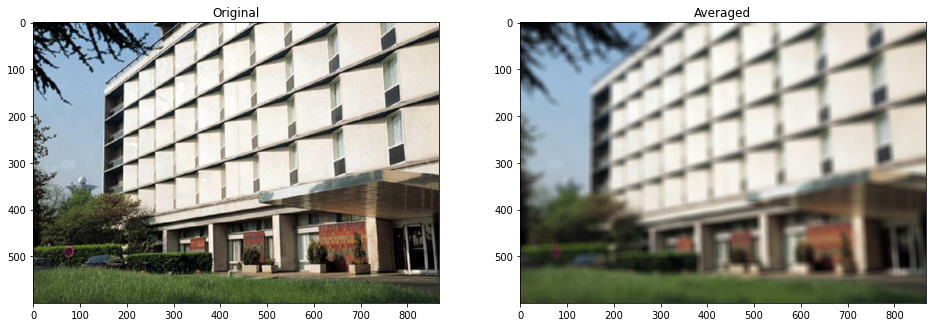

0.06429019457245264


In [3]:
img = cv.imread('./resources/building.jpg')

# 크기가 15인 박스필터 만들어 필터링하기
# TODO

# make kernel
N = 15
kernel = np.ones((N,N), np.float64) / (N * N)

# image filtering
avg = cv.filter2D(img, -1, kernel)
# ----------------------------------------------------------------------------

plt.subplot(1,2,1),plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB)),plt.title('Original')
plt.subplot(1,2,2),plt.imshow(cv.cvtColor(avg, cv.COLOR_BGR2RGB)),plt.title('Averaged')
plt.show()

# compare image with the test image
ref = cv.imread("./resources/box15.png")
mse = np.mean((ref - avg)**2)
print(mse)
assert mse < 1

## Other filters

* 이미지가 변경되지 않는 필터 (unchanged)

$K =  \begin{bmatrix} 0 & 0 & 0 \\ 0 & 1 & 0 \\ 0 & 0 & 0\end{bmatrix}$

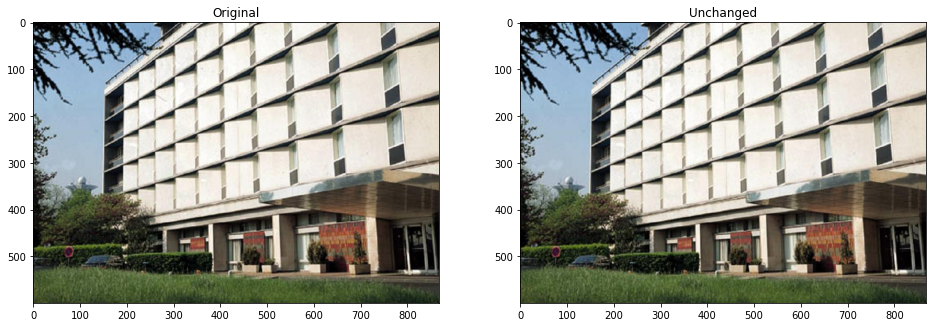

0.0


In [4]:
img = cv.imread('./resources/building.jpg')

# 그대로 이미지가 나오는 필터링 
# TODO

# make kernel
kernel = np.zeros((3,3), np.float64)
kernel[1, 1] = 1

# image filtering
unchanged = cv.filter2D(img, -1, kernel)
# ----------------------------------------------------------------------------

plt.subplot(1,2,1),plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB)),plt.title('Original')
plt.subplot(1,2,2),plt.imshow(cv.cvtColor(unchanged, cv.COLOR_BGR2RGB)),plt.title('Unchanged')
plt.show()

# compare image with the test image
ref = img
mse = np.mean((ref - img)**2)
print(mse)
assert mse < 1

* 이미지를 왼쪽으로 10 픽셀을 이동시키는 필터 (shift to left)
    * 커널의 중심으로 부터 10 픽셀 떨어진 위치에 1을 할당 (커널의 중심은 보통 커널의 중간 지점이다.)

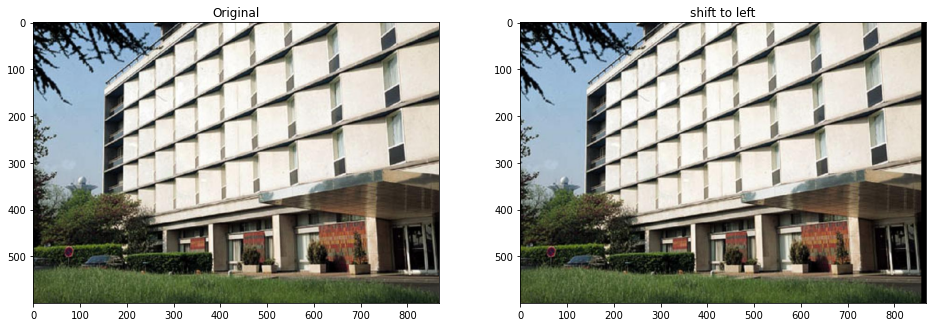

0.6582302867383513


In [5]:
img = cv.imread('./resources/building.jpg')

#TODO
# 이미지를 왼쪽으로 10 픽셀을 이동시키는 필터 구현하기

# make kernel
kernel = np.zeros((1, 21), np.float64)
kernel[0, -1] = 1 # Correlation
#kernel[0, 0] = 1 # Convolution

# image filtering (
# 이미지 보더 부분은 0으로 채워지게 설정 (use borderType=cv.BORDER_CONSTANT)
shifted = cv.filter2D(img, -1, kernel, borderType=cv.BORDER_CONSTANT)
#shifted = cv.filter2D(img, -1, kernel)

# ----------------------------------------------------------------------------

plt.subplot(1,2,1),plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB)),plt.title('Original')
plt.subplot(1,2,2),plt.imshow(cv.cvtColor(shifted, cv.COLOR_BGR2RGB)),plt.title('shift to left')
plt.show()


# compare image with the test image
ref = cv.imread("./resources/shifted10.png")
mse = np.mean((ref - shifted)**2)
print(mse)
assert mse < 1

## Sharpening filter

* 박스 필터를 이용하여 sharpening 필터를 만들 수 있다.

$K =  \begin{bmatrix} 0 & 0 & 0 \\ 0 & 2 & 0 \\ 0 & 0 & 0\end{bmatrix} - \frac{1}{9} \begin{bmatrix} 1 & 1 & 1 \\ 1 & 1 & 1 \\ 1 & 1 & 1\end{bmatrix}$

* 커널의 합이 1이여야 함


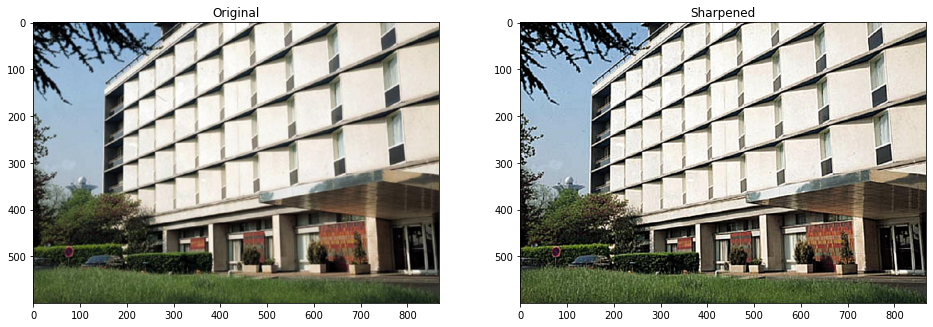

0.0


In [6]:
img = cv.imread('./resources/building.jpg')

#TODO
# sharpening filter 구현

# make kernel
N = 7  # 박스 필터의 크기는 7으로 할 것
kernel = -np.ones((N, N), np.float64) / (N * N)
kernel[N//2, N//2] += 2

# kernel[3,3] = 2 + kernel[3,3]

# image filtering
sharpened = cv.filter2D(img, -1, kernel)
# ----------------------------------------------------------------------------

plt.subplot(1,2,1),plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB)),plt.title('Original')
plt.subplot(1,2,2),plt.imshow(cv.cvtColor(sharpened, cv.COLOR_BGR2RGB)),plt.title('Sharpened')
plt.show()

# compare image with the test image
ref = cv.imread("./resources/sharpened7.png")
mse = np.mean((ref - sharpened)**2)
print(mse)
assert mse < 1

## Gaussian filter

* Named (like many other things) after Carl Friedrich Gauss, most representative low-pass filter.

* Kernel values sampled from the 2D Gaussian function, weight falls off with distance from center pixel

$f(i,j)=\frac{1}{2\pi\sigma^2} e{−\frac{i^2+j^2}{2\sigma^2}}$



* theoretically infinite, in practice truncated to some maximum distance


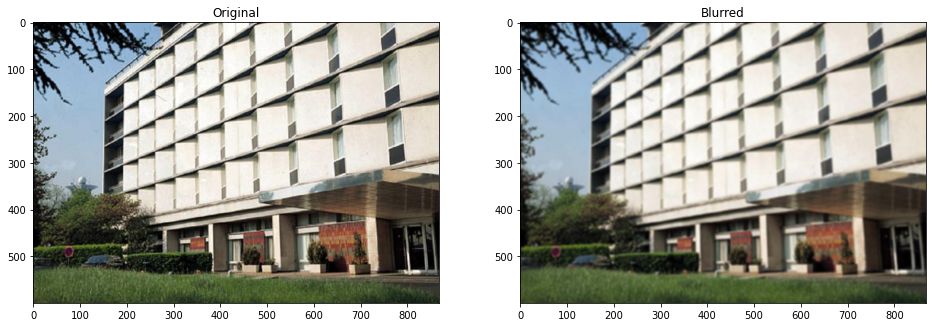

9.673714157706094


In [8]:
# gaussian filter를 구현
# cv.GaussianBlur 를 사용하지 마세요.
# TODO

# make kernel
sigma = 2.0 # sigma는 2.0로 할것
N = 7 # 필터 크기를 7로 할것

# 커널의 x와 y 좌표에 대해 gaussian function을 구한다.
# Hint: np.meshgrid([-1,0,1], [-1,0,1]) -> [[-1,0,1],       [[-1,-1,-1],
#                                           [-1,0,1],        [0,0,0],
#                                           [-1,0,1]]   ,    [1,1,1]]

# kernel = zeros((N, N), np.float64)
# for i in range(-N//2, N//2+1):
#     for j ...                        => meshgrid 사용

idx = np.arange(start=-(N//2), stop=(N//2) + 1)
x_idx, y_idx = np.meshgrid(idx, idx)

kernel = 1 / (2 * np.pi * sigma**2) * np.exp(-(x_idx**2 + y_idx**2) / (2 * (sigma**2)))

# 커널의 합(np.sum(kernel))이 1이 되야 함 (np.sum 을 사용)
kernel = kernel / np.sum(kernel)

# image filtering
blurred = cv.filter2D(img, -1, kernel)

# ----------------------------------------------------------------------------

plt.subplot(1,2,1),plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB)),plt.title('Original')
plt.subplot(1,2,2),plt.imshow(cv.cvtColor(blurred, cv.COLOR_BGR2RGB)),plt.title('Blurred')
plt.show()

# compare image with the test image
ref = cv.imread("./resources/gaussian.png")
mse = np.mean((ref - blurred)**2)
print(mse)
assert mse < 1

### Sobel filter and Image Gradient

* Sobel filter
    * Horizontal derivative
    
    $S_x = \ \begin{bmatrix} 1 & 0 & -1 \\ 2 & 0 & -2 \\ 1 & 0 & -1 \end{bmatrix}$
    
    * Vertical derivative 
    
    $S_y = \ \begin{bmatrix} 1 & 2 & 1 \\ 0 & 0 & 0 \\ -1 & -2 & -1 \end{bmatrix}$
    
    * Amplitude
    
    $||\nabla{f}||=\sqrt{\left( \frac{\partial f}{\partial x} \right)^2+\left(\frac{\partial f}{\partial y} \right)^2}$

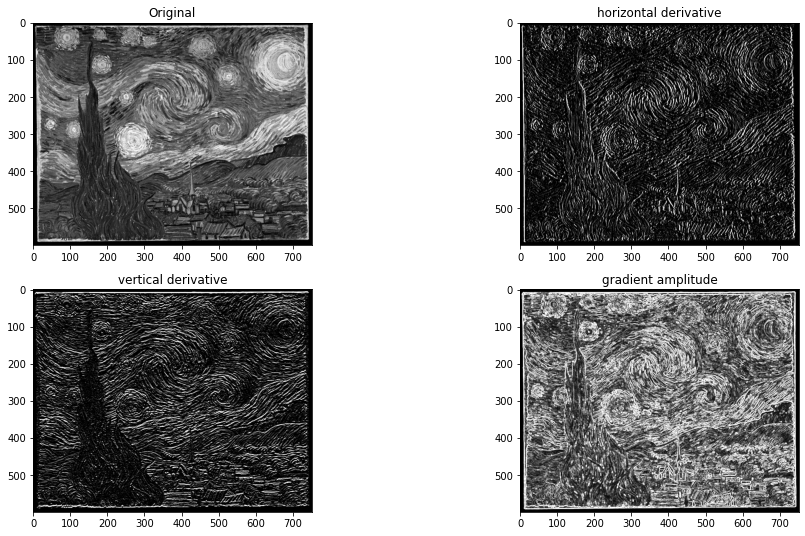

0.0
0.0
0.0


In [28]:
# 위의 Sobel Filter가 Convolution에 사용되는 필터이기 때문에 Flip을 해서 opencv에서 사용해야함
# openCV에서 사용할때 Sx는 좌우대칭, Sy는 상하대칭해서 사용함

img = cv.imread('./resources/starry_night.jpg')
img = cv.cvtColor(img,cv.COLOR_BGR2GRAY).astype(np.float64) / 255

# Sobel filter를 구현하여 image gradient 구하기
# horizontal derivative, vertical derivative, gradient amplitude를 구하기
# TODO

# make kernel
# NOTE: S_x and S_y are flipped! (by definition of convolution)
fx = np.array([[-1,0,1],[-2,0,2],[-1,0,1]], dtype = np.float64)
#fx = np.array([[1,0,-1],[2,0,-2],[1,0,-1]], dtype = np.float64) #filp을 하지 않을 경우  horizon의 좌측이 하얗게 변함

fy = np.array([[-1,-2,-1],[0,0,0],[1,2,1]], dtype = np.float64)
#fy = np.array([[1,2,1],[0,0,0],[-1,-2,-1]], dtype = np.float64) #filp을 하지 않을 경우  vertical의 위측이 하얗게 변함


# image filtering
# compute horizontal derivative, vertical derivative 
dx = cv.filter2D(img, -1, fx)
dy = cv.filter2D(img, -1, fy)

# compute amplitude 
amp = np.sqrt((dx**2) + (dy**2))

# --------------------------------

# convert data type 
dx  = (255*np.clip(dx,0.0,1.0)).astype(np.uint8)
dy = (255*np.clip(dy,0.0,1.0)).astype(np.uint8)
amp = (255*np.clip(amp,0.0,1.0)).astype(np.uint8)

plt.subplot(2,2,1),plt.imshow(img, cmap='gray'),plt.title('Original')
plt.subplot(2,2,2),plt.imshow(dx, cmap='gray'),plt.title('horizontal derivative')
plt.subplot(2,2,3),plt.imshow(dy, cmap='gray'),plt.title('vertical derivative')
plt.subplot(2,2,4),plt.imshow(amp, cmap='gray'),plt.title('gradient amplitude')
plt.show()


# compare image with the test image
ref = cv.imread("./resources/dx.png", cv.IMREAD_UNCHANGED)
mse = np.mean((ref - dx)**2)
print(mse)
assert mse < 1

ref = cv.imread("./resources/dy.png", cv.IMREAD_UNCHANGED)
mse = np.mean((ref - dy)**2)
print(mse)
assert mse < 1

ref = cv.imread("./resources/amp.png", cv.IMREAD_UNCHANGED)
mse = np.mean((ref - amp)**2)
print(mse)
assert mse < 1